In [1]:
import cv2 
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

[landmark {
  x: 0.5007777214050293
  y: 0.5687910914421082
  z: -0.04487208276987076
}
landmark {
  x: 0.5014848709106445
  y: 0.5085003972053528
  z: -0.05856070667505264
}
landmark {
  x: 0.49917563796043396
  y: 0.5343470573425293
  z: -0.037543635815382004
}
landmark {
  x: 0.4877282381057739
  y: 0.4692392349243164
  z: -0.035214945673942566
}
landmark {
  x: 0.5010625720024109
  y: 0.49295949935913086
  z: -0.05915004387497902
}
landmark {
  x: 0.49933069944381714
  y: 0.477141410112381
  z: -0.05086600035429001
}
landmark {
  x: 0.49405437707901
  y: 0.4439772963523865
  z: -0.010658439248800278
}
landmark {
  x: 0.41119110584259033
  y: 0.4654366374015808
  z: 0.021474070847034454
}
landmark {
  x: 0.492099791765213
  y: 0.4194011390209198
  z: 0.004626430105417967
}
landmark {
  x: 0.4918060898780823
  y: 0.40145009756088257
  z: 0.008021652698516846
}
landmark {
  x: 0.48830369114875793
  y: 0.34275299310684204
  z: 0.03927336260676384
}
landmark {
  x: 0.5009177923202515
  

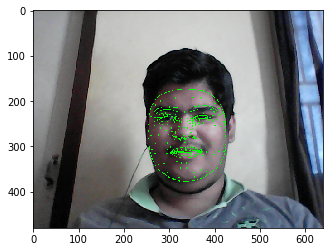

In [9]:
face_mesh = mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5, min_tracking_confidence=0.5)
flag = 0
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        # If loading a video, use 'break' instead of 'continue'.
        continue

  # Flip the image horizontally for a later selfie-view display, and convert
  # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
  # To improve performance, optionally mark the image as not writeable to
  # pass by reference.
    image.flags.writeable = False
    results = face_mesh.process(image)

  # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    if results.multi_face_landmarks:
        if(flag == 0):
            print(results.multi_face_landmarks)
        for face_landmarks in results.multi_face_landmarks:
#             if(flag == 0):
#                 print(face_landmarks)
            mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec)
    cv2.imshow('MediaPipe FaceMesh', image)
    flag = 1
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if cv2.waitKey(2) == 13 & 0xFF:
        break
face_mesh.close()
cv2.destroyAllWindows()
cap.release()

In [4]:
cap.release()

In [6]:
cv2.destroyAllWindows()
